<a href="https://colab.research.google.com/github/yiyun-wang/Interactive-Lab-Hub/blob/master/AML_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# Import the data 
df = pd.read_csv("/content/drive/MyDrive/AML/AML Project /fetal_health.csv")

# Data Processing

Print out all the feature information and data summaries. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


This shows that the features after "mean_value_of_long_term_variability" is a measurement of how FHR changes over a time period plotted into a histogram. 

## Checking if values are missing 

In [ ]:
# Count the missing and null values for dataset fetal health
miss_values = df.columns[df.isnull().any()]
print(f"Missing values:\n{df[miss_values].isnull().sum()}")

null_values = df.columns[df.isna().any()]
print(f"Null values:\n{df[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


There is no missing values in the dataset. 

### Plot the histogram for all features

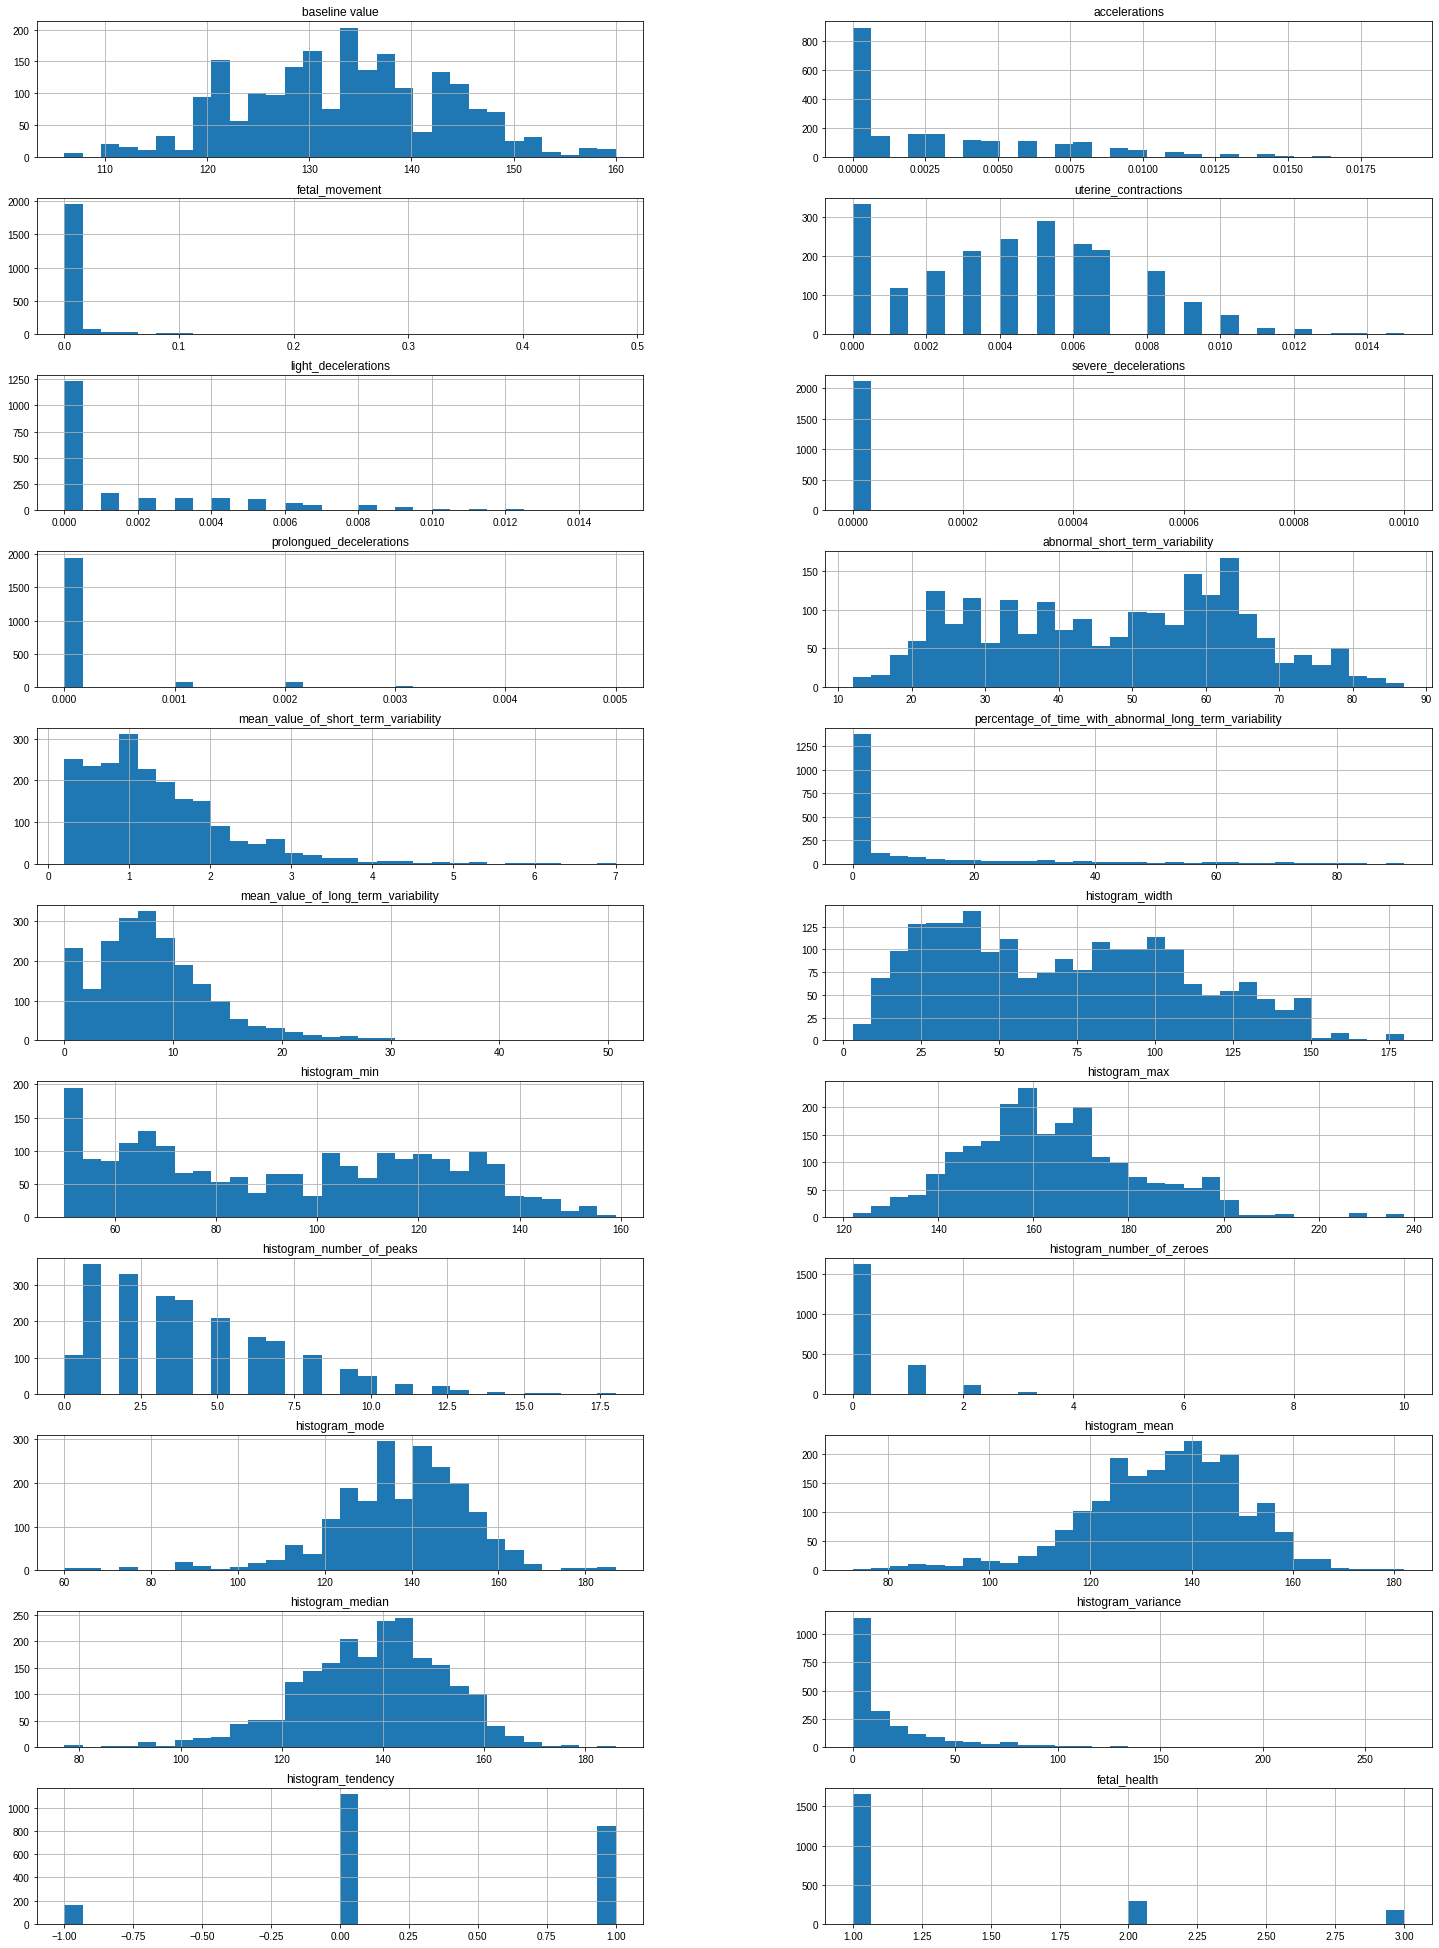

In [ ]:
fig, axis =plt.subplots(11,2,figsize=(25,35)) 
plt.style.use("seaborn")
df.hist(ax=axis, bins=30);

From the histograms, we see that histogram number of peaks, histogram number of zeroes, histogram mode, histogram mean, histogram median, histogram variance	, histogram tendency, and fetal health the eight features that are discrete. All other features are continuous. Also, severe decelerations only has values of 0. 

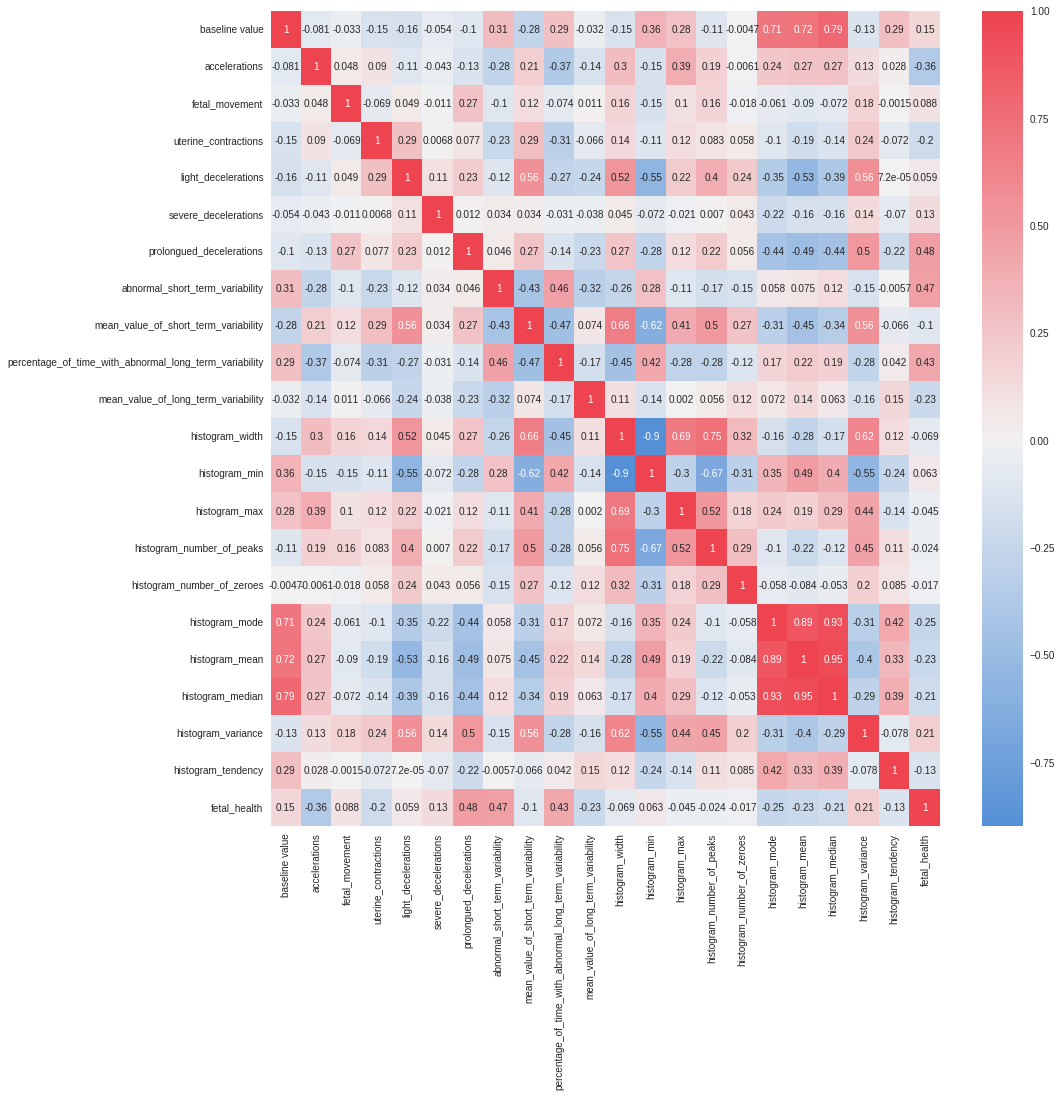

In [ ]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

From the correlation graph, we discover that there are strong correlation between fetal health and acceleration, prolonged decelerations, abnormal short term variability, percentage of time with abnormal long term variability, and also histogram's mode, mean, median, and variance. 


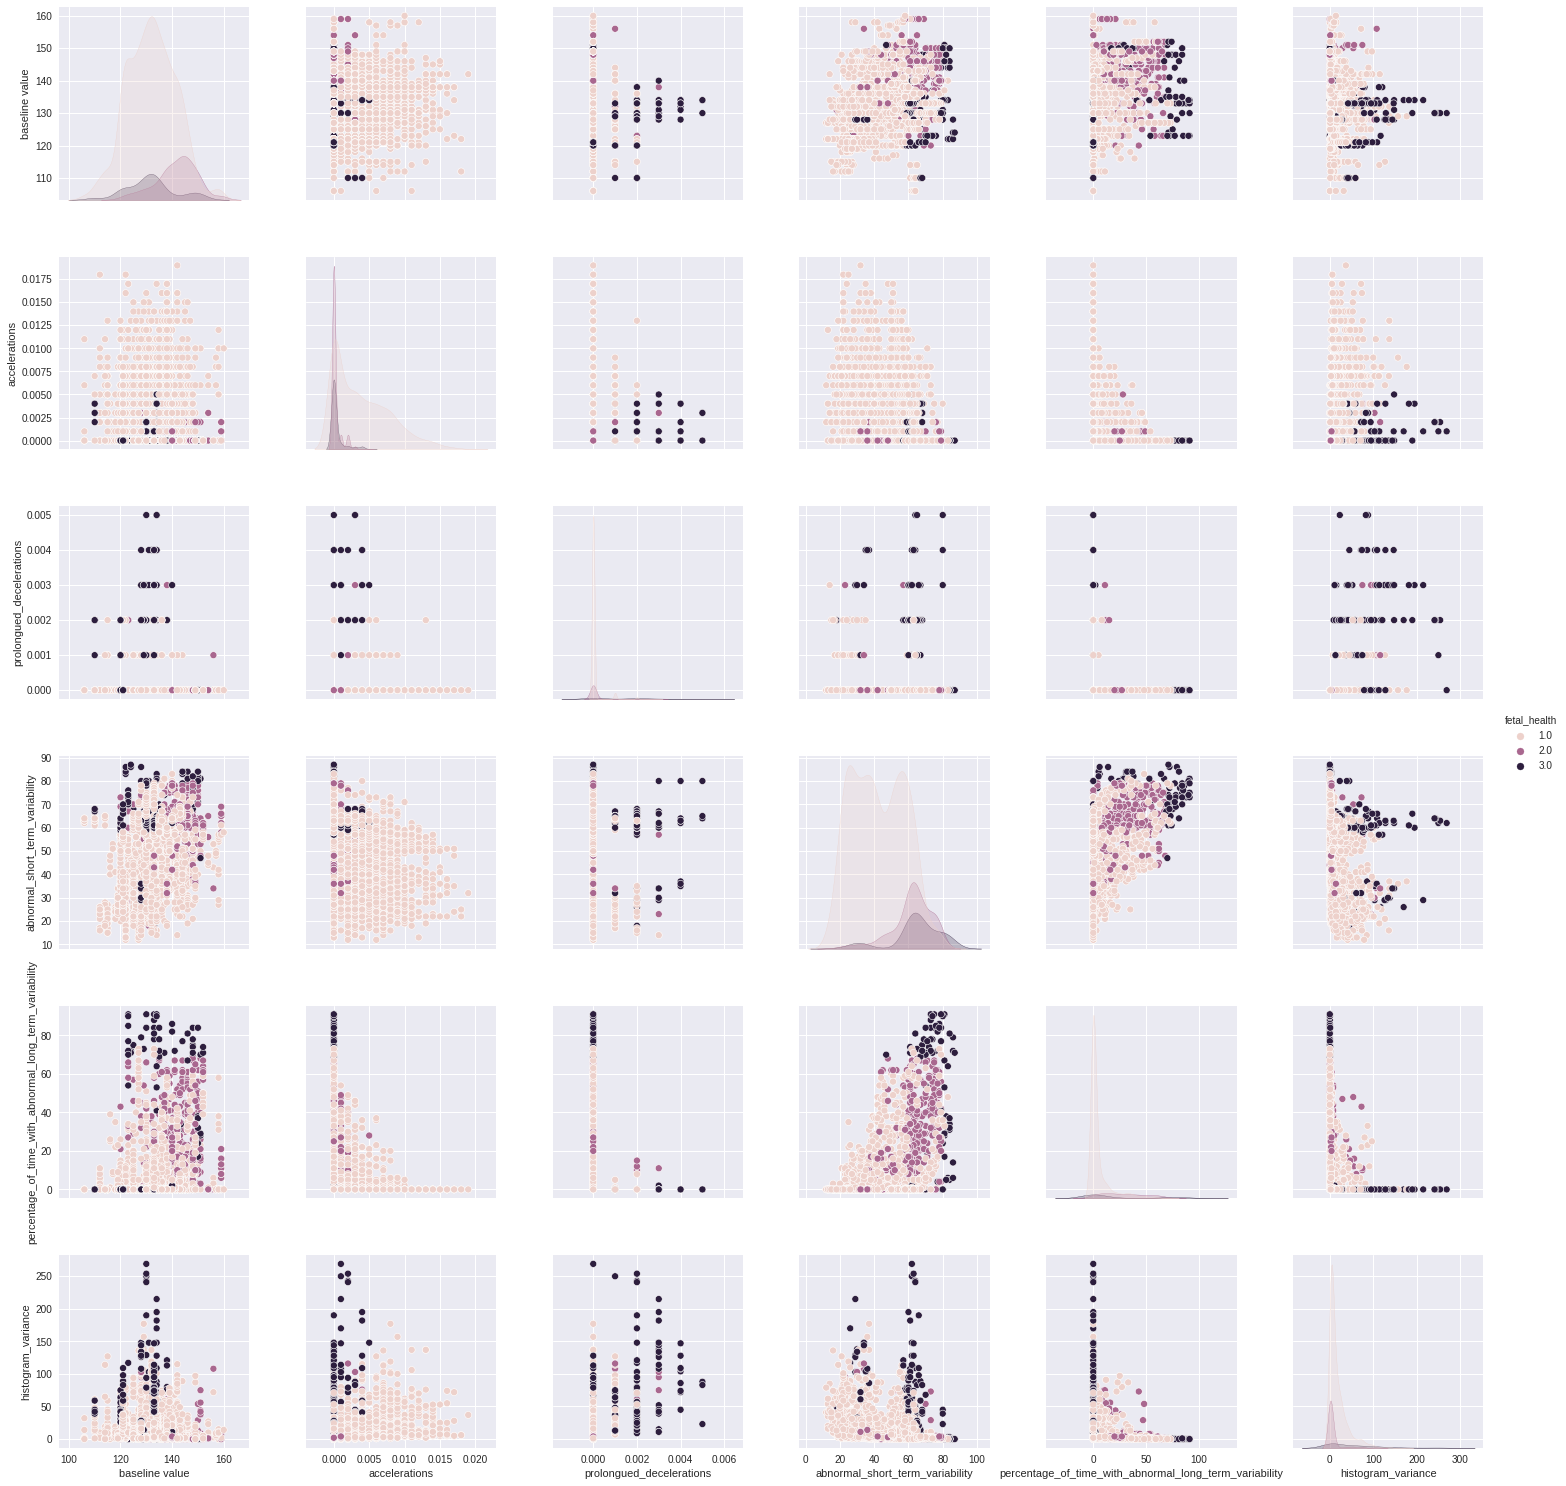

In [ ]:
sns.pairplot(data=df[
    ['baseline value', 'accelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability',
     'histogram_variance', 'fetal_health'
    ]
], hue='fetal_health',height = 3.5);

## Standardization

In [ ]:
X = df.iloc[:,0:21]
y = df["fetal_health"]

In [ ]:
from sklearn.preprocessing import StandardScaler
#normalized_X=(X-X.mean())/X.std()
#normalized_X.head()
std = StandardScaler()
X = std.fit_transform(X)

# Model 1 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state = 2)

model = LogisticRegression(solver='liblinear').fit(x_train,y_train)
y_predict=model.predict(x_test)
y_t_predict=model.predict(x_train)
display(model.score(x_test,y_test))
display(model.predict_proba(x_test))

0.9043887147335423

array([[6.81253518e-01, 3.17607281e-01, 1.13920114e-03],
       [9.97619508e-01, 1.86451054e-03, 5.15981867e-04],
       [9.98789999e-01, 9.34936226e-04, 2.75064579e-04],
       ...,
       [9.98754934e-01, 5.76937048e-04, 6.68129137e-04],
       [4.81109108e-01, 4.13128275e-01, 1.05762618e-01],
       [3.31317664e-02, 8.45209927e-01, 1.21658307e-01]])

In [ ]:
# Display the r2 score 
print(['R2: ',r2_score(y_test, y_predict)]) 

# Display the accuracy score 
print(['Accuracy of testing: ',accuracy_score(y_test, y_predict)])

# Display the accuracy score 
print(['Accuracy of training: ',accuracy_score(y_train, y_t_predict)])

# Display the classification report 
print(classification_report(y_test, y_predict))

['R2: ', 0.6160515299610483]
['Accuracy of testing: ', 0.9043887147335423]
['Accuracy of training: ', 0.9018817204301075]
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95       501
         2.0       0.72      0.65      0.68        85
         3.0       0.84      0.71      0.77        52

    accuracy                           0.90       638
   macro avg       0.83      0.78      0.80       638
weighted avg       0.90      0.90      0.90       638



Based on the evaluation metrics above, the logistic regression shows an accuracy of 90.4%. From the classification report, we discovered that the logistic regresison model performed the best in type 1, worse in type 3, and the worst in type 2 with a f1 score of 0.68. Thus, we will need to evaluate the features we used in the model and also creates more attributes. 

## Feature selection 

In [ ]:
# Standardization
data_top = df.columns 
a = df['fetal_health']
df=pd.DataFrame(StandardScaler().fit_transform(df))
df.columns = data_top
df['fetal_health'] = a
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,-1.352220,-0.822388,-0.203210,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,-1.028560,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980,2.0
1,-0.132526,0.730133,-0.203210,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,0.393176,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526,1.0
2,-0.030884,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,0.926327,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526,1.0
3,0.070757,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.632411,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980,1.0
4,-0.132526,0.988886,-0.203210,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.081488,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680604,-0.822388,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.862255,-1.282833,0.823885,-0.175519,-0.781736,1.469229,0.723223,-0.023130,-0.458444,0.949354,0.987141,0.961731,-0.580173,-0.524526,2.0
2122,0.680604,-0.563635,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.804078,-1.056341,0.660775,-0.193290,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.858853,0.892590,-0.545656,1.112980,2.0
2123,0.680604,-0.563635,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.862255,-1.056341,0.552035,-0.371007,-0.088478,0.318764,0.333033,0.316003,-0.458444,0.949354,0.858853,0.961731,-0.511138,1.112980,2.0
2124,0.680604,-0.563635,-0.203210,0.554627,-0.638438,-0.057476,-0.268754,1.804078,-1.056341,0.932624,-0.211062,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.794709,0.892590,-0.511138,1.112980,2.0


In [ ]:
# Create new feature: histogram_range 
df["histogram_range"] = df['histogram_max']-df['histogram_min']

# Create new feature: HR_mean_outlier
data = df["histogram_mean"]

lower_bound = data.mean() - 3*data.std() 
upper_bound = data.mean() + 3*data.std() 

print(lower_bound)
print(upper_bound)

df['HR_mean_outlier']=np.where(((df['histogram_mean']<lower_bound )| (df['histogram_mean']>upper_bound)), 1, 0)

-3.0007057993274944
3.0007057993274935


In [ ]:
# Correlation
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["fetal_health"])
#Selecting highly correlated features
relevant_features = cor_target
relevant_features.sort_values(ascending=False)

## severe_decelerations has only zeros and has a corr of 0.13. 

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
accelerations                                             0.364066
HR_mean_outlier                                           0.293241
histogram_mode                                            0.250412
histogram_mean                                            0.226985
mean_value_of_long_term_variability                       0.226797
histogram_variance                                        0.206630
histogram_median                                          0.205033
uterine_contractions                                      0.204894
baseline value                                            0.148151
histogram_tendency                                        0.131976
severe_decelerations                                      0.13

In [ ]:
X = df.drop(columns="fetal_health")
y = df["fetal_health"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state = 2)

Optimal number of features: 17


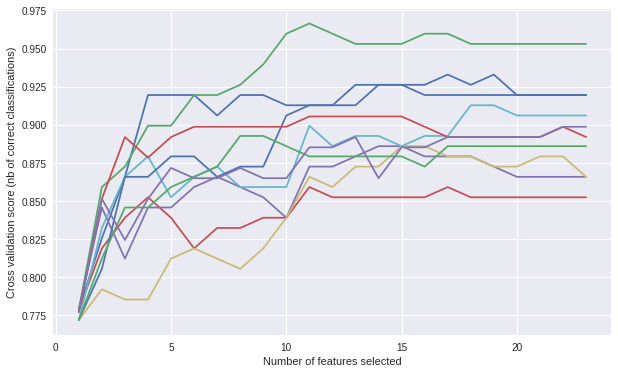

In [ ]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), cv=10, scoring='accuracy')
rfecv.fit(x_train, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)
#print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show() 

After the Recursive Feature Elimination and Cross-Validation Selection, we discovered that the optimal number of features is 20, the cross validation is levelled after 11 features from the figure above. We would like to proceed with 17 features. 

In [ ]:
df.shape

(2126, 24)

## Logistic Regression after feature selection

In [ ]:
df_new = df.drop(columns=[ "histogram_number_of_zeroes", 
                          "histogram_number_of_peaks","histogram_max","light_decelerations",
                          "histogram_min", "histogram_range"]) 
X = df_new.drop(columns="fetal_health")
y = df_new["fetal_health"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state = 2)
model = LogisticRegression(solver='liblinear').fit(x_train,y_train)
pred_lr=model.predict(x_test)
y_t_predict=model.predict(x_train)
display(model.score(x_test,y_test))
display(model.predict_proba(x_test))
# Display the r2 score 
print(['R2: ',r2_score(y_test, pred_lr)]) 

# Display the accuracy score 
print(['Accuracy of testing: ',accuracy_score(y_test, pred_lr)])

# Display the accuracy score 
print(['Accuracy of training: ',accuracy_score(y_train, y_t_predict)])

# Display the classification report 
print(classification_report(y_test, pred_lr))

0.9028213166144201

array([[6.45561610e-01, 3.53536580e-01, 9.01810073e-04],
       [9.97163964e-01, 2.16504570e-03, 6.70990405e-04],
       [9.98749756e-01, 8.03347264e-04, 4.46897218e-04],
       ...,
       [9.98156991e-01, 1.39228557e-03, 4.50723763e-04],
       [4.69993876e-01, 4.37575748e-01, 9.24303763e-02],
       [5.69022848e-02, 8.03029437e-01, 1.40068278e-01]])

['R2: ', 0.6118323160045762]
['Accuracy of testing: ', 0.9028213166144201]
['Accuracy of training: ', 0.8991935483870968]
              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       501
         2.0       0.72      0.64      0.67        85
         3.0       0.85      0.65      0.74        52

    accuracy                           0.90       638
   macro avg       0.83      0.75      0.79       638
weighted avg       0.90      0.90      0.90       638



# Model 2 Random Forest 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
y_t_predict=rf.predict(x_train)
display(rf.score(x_test,y_test))
display(rf.predict_proba(x_test))
# Display the classification report 
print(classification_report(y_test, pred_rf))

0.9435736677115988

array([[0.47, 0.51, 0.02],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       ...,
       [1.  , 0.  , 0.  ],
       [0.15, 0.71, 0.14],
       [0.01, 0.96, 0.03]])

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       501
         2.0       0.84      0.76      0.80        85
         3.0       0.94      0.90      0.92        52

    accuracy                           0.94       638
   macro avg       0.91      0.88      0.90       638
weighted avg       0.94      0.94      0.94       638



# Model 3 KNN

In [ ]:
# Baseline model of K-Nearest Neighbors with default parameters:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_mod = knn.fit(x_train, y_train)
pred_knn = knn_mod.predict(x_test)
display(knn.score(x_test,y_test))
display(knn.predict_proba(x_test))
# Display the classification report 
print(classification_report(y_test, pred_knn))

0.9090909090909091

array([[0.4, 0.6, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       ...,
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ]])

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       501
         2.0       0.75      0.64      0.69        85
         3.0       0.90      0.71      0.80        52

    accuracy                           0.91       638
   macro avg       0.86      0.77      0.81       638
weighted avg       0.90      0.91      0.91       638



# Model 4 - Gradient Boosting classifier (GBC)


In [ ]:
# Baseline model of gradient boosting classifier with default parameters:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc_mod = gbc.fit(x_train, y_train)

pred_gbc = gbc_mod.predict(x_test)
display(gbc.score(x_test,y_test))
display(gbc.predict_proba(x_test))
# Display the classification report 
print(classification_report(y_test, pred_gbc))

0.9529780564263323

array([[5.00654779e-01, 4.97359742e-01, 1.98547910e-03],
       [9.96518715e-01, 3.03993989e-03, 4.41345599e-04],
       [9.97785033e-01, 1.93366090e-03, 2.81306385e-04],
       ...,
       [9.98177800e-01, 1.54839410e-03, 2.73806228e-04],
       [7.47555255e-02, 9.18946036e-01, 6.29843838e-03],
       [3.36052506e-03, 9.94727736e-01, 1.91173918e-03]])

              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       501
         2.0       0.89      0.80      0.84        85
         3.0       0.98      0.88      0.93        52

    accuracy                           0.95       638
   macro avg       0.94      0.89      0.92       638
weighted avg       0.95      0.95      0.95       638



# Model comparasion and tuning

In [ ]:
print(f"Baseline Logistic Regression: {round(model.score(x_test, y_test), 3)}")
print(f"Baseline Random Forest: {round(rf.score(x_test, y_test), 3)}")
print(f"Baseline K-Nearest Neighbors: {round(knn_mod.score(x_test, y_test), 3)}")
print(f"Baseline gradient boosting classifier: {round(gbc_mod.score(x_test, y_test), 3)}")

Baseline Logistic Regression: 0.903
Baseline Random Forest: 0.945
Baseline K-Nearest Neighbors: 0.909
Baseline gradient boosting classifier: 0.953


Thus, tuning is needed for Random Forest and also GBC to see which classification method perfomed the best. 

# Tuning

In [ ]:
# Using cross validation to verify the accuracy score 
from sklearn.model_selection import StratifiedKFold
cv_method = StratifiedKFold(n_splits=3, random_state=52, shuffle=True)

## Random Forest 

In [ ]:
# Grid Search could be used to search for the best parameters 
from sklearn.model_selection import GridSearchCV
# Set the parameters first 
para_rf = {"min_samples_split": [2, 5, 20],
           "min_samples_leaf": [1, 5, 10],
           "n_estimators" :[50,100,200,500],
           "criterion": ["gini"]
           }

# Set up the grid search based on accuracy 
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(),
                               param_grid=para_rf,
                               cv=cv_method,
                               verbose=1,
                               n_jobs=2,
                               scoring="accuracy",
                               return_train_score=True
                               )

In [ ]:
# Fit model with data
GridSearchCV_RF.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=52, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini'], 'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 20],
                         'n_estimators': [50, 100, 200, 500]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
best_RF = GridSearchCV_RF.best_estimator_
print(f"Best estimator for RF model:\n{best_RF}")

best_para_RF = GridSearchCV_RF.best_params_
print(f"Best parameter values for RF model:\n{best_para_RF}")

best_score_RF = GridSearchCV_RF.best_score_
print(f"Best score for RF model: {round(best_score_RF, 3)}")

Best estimator for RF model:
RandomForestClassifier()
Best parameter values for RF model:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for RF model: 0.935


In [ ]:
# Run the best RF model again 
random_forest = RandomForestClassifier(criterion="gini", 
                                       n_estimators=500, 
                                       min_samples_leaf=1, 
                                       min_samples_split=2, 
                                       random_state=52)
random_forest_mod = random_forest.fit(x_train, y_train)
pred_random_forest = random_forest_mod.predict(x_test)

display(random_forest.score(x_test,y_test))
display(random_forest.predict_proba(x_test))

0.9482758620689655

array([[0.508, 0.466, 0.026],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       ...,
       [1.   , 0.   , 0.   ],
       [0.186, 0.698, 0.116],
       [0.006, 0.926, 0.068]])

In [ ]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       501
         2.0       0.88      0.76      0.82        85
         3.0       0.94      0.90      0.92        52

    accuracy                           0.95       638
   macro avg       0.93      0.88      0.90       638
weighted avg       0.95      0.95      0.95       638



##### Confusion Matrix

<function matplotlib.pyplot.show>

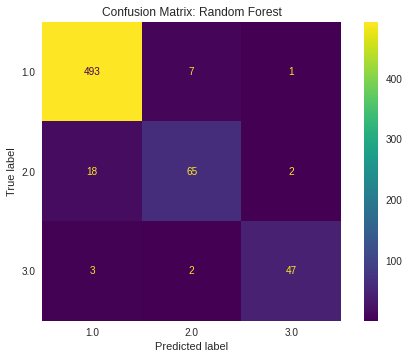

In [ ]:
# Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_forest_mod, x_test, y_test)
plt.grid(False)
plt.title("Confusion Matrix: Random Forest")
plt.show

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_rf)

In [ ]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#Print all results 
print ('Sensitivity=',TPR)
print ('Specifcity=',TNR)
print ('Percision=',PPV)
print ('Negaitve Perdictive Value=',NPV)
print ('False Positive Rate=',FPR)
print ('False Negative Rate=',FNR)
print ('False Discovery Rate=',FDR)
print ('Accuracy=',ACC)

Sensitivity= [0.98203593 0.76470588 0.88461538]
Specifcity= [0.83211679 0.98372514 0.99488055]
Percision= [0.95533981 0.87837838 0.93877551]
Negaitve Perdictive Value= [0.92682927 0.96453901 0.98981324]
False Positive Rate= [0.16788321 0.01627486 0.00511945]
False Negative Rate= [0.01796407 0.23529412 0.11538462]
False Discovery Rate= [0.04466019 0.12162162 0.06122449]
Accuracy= [0.94984326 0.95454545 0.98589342]


## GBC
The GBC tuning could be aimed on Tree-Specific Parameters, boosting para, and also Miscellaneous para

In [ ]:
para_GBC = {"loss": ["deviance"],
            "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
            "n_estimators": [100, 250, 500],
            "max_depth": [3, 5, 10]
            }

In [ ]:
GridSearchCV_GBC = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                param_grid=para_GBC, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [ ]:
GridSearchCV_GBC.fit(x_train, y_train)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=52, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=2,
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'loss': ['deviance'], 'max_depth': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
best_GBC = GridSearchCV_GBC.best_estimator_
print(f"Best estimator for GBC model:\n{best_GBC}")

best_para_GBC = GridSearchCV_GBC.best_params_
print(f"Best parameter values for GBC model:\n{best_para_GBC}")

best_score_GBC = GridSearchCV_GBC.best_score_
print(f"Best score for GBC model: {round(best_score_GBC, 3)}")

Best estimator for GBC model:
GradientBoostingClassifier(learning_rate=0.075)
Best parameter values for GBC model:
{'learning_rate': 0.075, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 100}
Best score for GBC model: 0.946


In [ ]:
# Run the best GBC
gbc = GradientBoostingClassifier(criterion="friedman_mse", 
                                 learning_rate=0.075, 
                                 loss="deviance", 
                                 max_depth=3, 
                                 max_features="log2", 
                                 min_samples_leaf=0.2, 
                                 min_samples_split=5, 
                                 n_estimators=500, 
                                 random_state=52)
gbc_mod = gbc.fit(x_train, y_train)
pred_gbc = gbc_mod.predict(x_test)

display(random_forest.score(x_test,y_test))
display(random_forest.predict_proba(x_test))

0.9482758620689655

array([[0.508, 0.466, 0.026],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       ...,
       [1.   , 0.   , 0.   ],
       [0.186, 0.698, 0.116],
       [0.006, 0.926, 0.068]])

In [ ]:
print("Classification Report")
print(classification_report(y_test, pred_gbc))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       501
         2.0       0.76      0.75      0.76        85
         3.0       0.80      0.71      0.76        52

    accuracy                           0.92       638
   macro avg       0.84      0.81      0.82       638
weighted avg       0.92      0.92      0.92       638



### Confusion Matrix

<function matplotlib.pyplot.show>

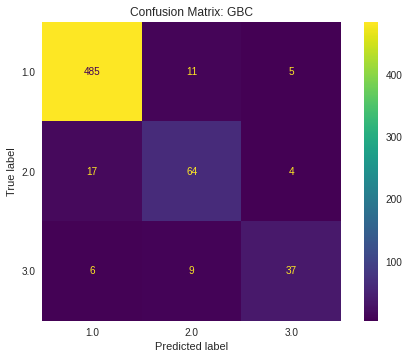

In [ ]:
# Confusion Matrix GBC
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbc_mod, x_test, y_test)
plt.grid(False)
plt.title("Confusion Matrix: GBC")
plt.show

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_gbc)

In [ ]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#Print all results 
print ('Sensitivity=',TPR)
print ('Specifcity=',TNR)
print ('Percision=',PPV)
print ('Negaitve Perdictive Value=',NPV)
print ('False Positive Rate=',FPR)
print ('False Negative Rate=',FNR)
print ('False Discovery Rate=',FDR)
print ('Accuracy=',ACC)

Sensitivity= [0.96806387 0.75294118 0.71153846]
Specifcity= [0.83211679 0.96383363 0.98464164]
Percision= [0.95472441 0.76190476 0.80434783]
Negaitve Perdictive Value= [0.87692308 0.96209386 0.97466216]
False Positive Rate= [0.16788321 0.03616637 0.01535836]
False Negative Rate= [0.03193613 0.24705882 0.28846154]
False Discovery Rate= [0.04527559 0.23809524 0.19565217]
Accuracy= [0.93887147 0.93573668 0.96238245]


### ROC 

In [ ]:
y_test_OH = []
y_test_OH = [y_test_OH,1]

In [ ]:
# Convert the classification into OH
import numpy as np
y_test_OH=[]
for n in range (1, len(y_test)):
  if y_test.index[n] == 1:
    y_test_OH.append(1)
  else:
    y_test_OH.append(0)


In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    gbc, x_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

ValueError: ignored

In [ ]:
n_classes = 3

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit_transform(y_test)


In [ ]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_gbc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_gbc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Sensitivity= [0.96806387 0.75294118 0.71153846]
Specifcity= [0.83211679 0.96383363 0.98464164]
Percision= [0.95472441 0.76190476 0.80434783]
Negaitve Perdictive Value= [0.87692308 0.96209386 0.97466216]
False Positive Rate= [0.16788321 0.03616637 0.01535836]
False Negative Rate= [0.03193613 0.24705882 0.28846154]
False Discovery Rate= [0.04527559 0.23809524 0.19565217]
Accuracy= [0.93887147 0.93573668 0.96238245]
